<a href="https://colab.research.google.com/github/alexphil12/Audio_continu_fin/blob/main/prediction_power_lstm_iterate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [7]:
mesure=["Fecha","Hora"];
mesure.append("Voltaje_(R)_[V]")	
mesure.append("Voltaje_(S)_[V]")	
mesure.append("Voltaje_(T)_[V]")	
mesure.append("Voltaje_(RS)_[V]")	
mesure.append("Voltaje_(ST)_[V]")	
mesure.append("Voltaje_(TR)_[V]")	
mesure.append("Corriente_R_[A]")	
mesure.append("Corriente_S_[A]")	
mesure.append("Corriente_T_[A]")	
mesure.append("Potencia_R_[VA]")	
mesure.append("Potencia_S_[VA]")	
mesure.append("Potencia_T_[VA]")	
mesure.append("Potencia_R_[W]")	
mesure.append("Potencia_S_[W]")	
mesure.append("Potencia_T_[W]")	
mesure.append("Potencia_R_[VAR]")	
mesure.append("Potencia_S_[VAR]")	
mesure.append("Potencia_T_[VAR]")	
mesure.append("Corriente_N_[A]")	
mesure.append("Frecuencia_[Hz]")	
mesure.append("not_sure_1")	
mesure.append("not_sure_2")	
mesure.append("not_sure_3")	
mesure.append("Potencia_3F_[KVA]")	
mesure.append("Potencia_3F_[W]")	
mesure.append("Potencia_3F_[VAR]")	
mesure.append("Factor de Potencia")

In [8]:
data1=pd.read_csv("/content/df_cov_continu_1_1.txt",sep=",",header=0,names=mesure)
data2=pd.read_csv("/content/df_cov_continu_1_2.txt",sep=",",header=0,names=mesure)
data3=pd.read_csv("/content/df_cov_continu_1_3.txt",sep=",",header=0,names=mesure)
data4=pd.read_csv("/content/df_cov_continu_1_4.txt",sep=",",header=0,names=mesure)

In [9]:
train_data_1=data1.iloc[0:round(10253*0.8),:]

test_data_1=data1.iloc[round(10253*0.8):10253,:]

train_data_2=data1.iloc[0:round(9641*0.8),:]

test_data_2=data1.iloc[round(9641*0.8):9641,:]

train_data_3=data3.iloc[0:round(8358*0.8),:]

test_data_3=data3.iloc[round(8358*0.8):8358,:]

train_data_4=data4.iloc[0:round(5363*0.8),:]

test_data_4=data4.iloc[round(5363*0.8):5363,:]

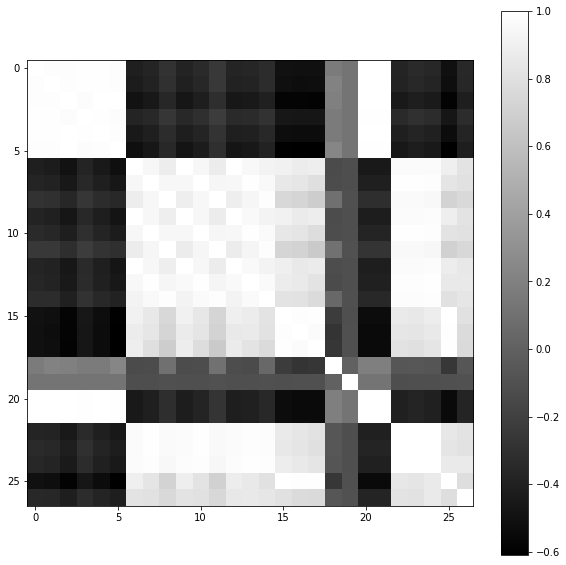

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(data1.corr(),cmap="gray")
plt.colorbar()

In [11]:
#train_data_1.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)
#test_data_1.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)

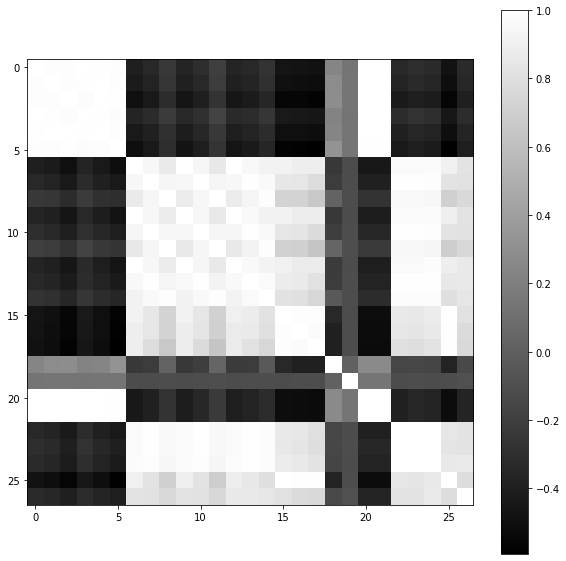

In [12]:
RSG_train_1 = train_data_1.iloc[:,2].values
RSG_test_1=test_data_1.iloc[:,2].values
RSG_train_2=train_data_2.iloc[:,2].values
RSG_test_2=train_data_2.iloc[:,2].values
RSG_train_3 = train_data_3.iloc[:,2].values
RSG_test_3=test_data_3.iloc[:,2].values
RSG_train_4=train_data_4.iloc[:,2].values
RSG_test_4=train_data_4.iloc[:,2].values
plt.figure(figsize=(10,10))
plt.imshow(train_data_1.corr(),cmap="gray")
plt.colorbar()

In [13]:
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()
RSG_train_1=np.reshape(RSG_train_1,(-1,1))
RSG_test_1=np.reshape(RSG_test_1,(-1,1))
RSG_train_2=np.reshape(RSG_train_2,(-1,1))
RSG_test_2=np.reshape(RSG_test_2,(-1,1))
RSG_train_3=np.reshape(RSG_train_3,(-1,1))
RSG_test_3=np.reshape(RSG_test_3,(-1,1))
RSG_train_4=np.reshape(RSG_train_4,(-1,1))
RSG_test_4=np.reshape(RSG_test_4,(-1,1))
scaler.fit(RSG_train_1)
scaler2.fit(RSG_train_2)
scaler3.fit(RSG_train_3)
scaler4.fit(RSG_train_4)

MinMaxScaler()

In [14]:
scaled_1_train = scaler.transform(RSG_train_1)
scaled_1_test = scaler.transform(RSG_test_1)
scaled_2_train=scaler2.transform(RSG_train_2)
scaled_2_test=scaler2.transform(RSG_test_2)
scaled_3_train = scaler.transform(RSG_train_3)
scaled_3_test = scaler.transform(RSG_test_3)
scaled_4_train=scaler2.transform(RSG_train_4)
scaled_4_test=scaler2.transform(RSG_test_4)

In [15]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [16]:
n_input = 20
n_features = 0
train_generator_1 = TimeseriesGenerator(scaled_1_train, scaled_1_train, length=n_input, batch_size=10)
test_generator_1=TimeseriesGenerator(scaled_1_test, scaled_1_test, length=n_input, batch_size=10)
train_generator_2 = TimeseriesGenerator(scaled_2_train, scaled_2_train, length=n_input, batch_size=10)
test_generator_2=TimeseriesGenerator(scaled_2_test, scaled_2_test, length=n_input, batch_size=10)
train_generator_3 = TimeseriesGenerator(scaled_3_train, scaled_3_train, length=n_input, batch_size=10)
test_generator_3=TimeseriesGenerator(scaled_3_test, scaled_3_test, length=n_input, batch_size=10)
train_generator_4 = TimeseriesGenerator(scaled_4_train, scaled_4_train, length=n_input, batch_size=10)
test_generator_4=TimeseriesGenerator(scaled_4_test, scaled_4_test, length=n_input, batch_size=10)

In [17]:
X,y = train_generator_1[0]
X1,y1=test_generator_2[0]

In [18]:
print(f'Predicción: \n {y}')
print(f'data: \n {X}')

Predicción: 
 [[0.47663551]
 [0.54413292]
 [0.53569574]
 [0.44483385]
 [0.41679647]
 [0.38200935]
 [0.38875909]
 [0.43444964]
 [0.43029595]
 [0.37889408]]
data: 
 [[[0.57178089]
  [0.5912513 ]
  [0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.2645379 ]
  [0.30698339]
  [0.32113188]]

 [[0.5912513 ]
  [0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.2645379 ]
  [0.30698339]
  [0.32113188]
  [0.47663551]]

 [[0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.264

In [19]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout


In [20]:
from keras.layers.recurrent_v2 import LSTM
# define model
model = Sequential()
model.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

In [21]:
model1 = Sequential()
model1.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model1.add(Dense(1, activation = "linear"))

model1.compile(loss='mse', optimizer='adam')

In [22]:
model2 = Sequential()
model2.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model2.add(Dense(1, activation = "linear"))

model2.compile(loss='mse', optimizer='adam')

In [23]:
model3 = Sequential()
model3.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model3.add(Dense(1, activation = "linear"))

model3.compile(loss='mse', optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model1.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model2.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model3.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)

Epoch 1/10
10/10 [==============================] - 3s 95ms/step - loss: 0.3199 - val_loss: 0.2504
Epoch 2/10
10/10 [==============================] - 1s 69ms/step - loss: 0.1974 - val_loss: 0.1815
Epoch 3/10
10/10 [==============================] - 1s 71ms/step - loss: 0.1468 - val_loss: 0.1094
Epoch 4/10
10/10 [==============================] - 1s 71ms/step - loss: 0.0778 - val_loss: 0.0439
Epoch 5/10
10/10 [==============================] - 1s 73ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 6/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 7/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0137 - val_loss: 0.0079
Epoch 8/10
10/10 [==============================] - 1s 66ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 9/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 10/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0142 - val_loss: 0.0080
Epoch 1/1

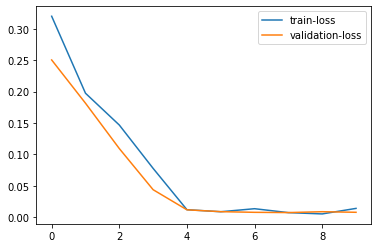

In [26]:
loss_per_epoch = model.history.history['loss']
loss_vall=model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [27]:
model1.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)
model2.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)
model3.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)

Epoch 1/10
10/10 [==============================] - 2s 216ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 2/10
10/10 [==============================] - 2s 217ms/step - loss: 0.0114 - val_loss: 0.0089
Epoch 3/10
10/10 [==============================] - 2s 209ms/step - loss: 0.0081 - val_loss: 0.0085
Epoch 4/10
10/10 [==============================] - 2s 211ms/step - loss: 0.0062 - val_loss: 0.0081
Epoch 5/10
10/10 [==============================] - 2s 218ms/step - loss: 0.0108 - val_loss: 0.0080
Epoch 6/10
10/10 [==============================] - 2s 213ms/step - loss: 0.0043 - val_loss: 0.0078
Epoch 7/10
10/10 [==============================] - 2s 214ms/step - loss: 0.0071 - val_loss: 0.0081
Epoch 8/10
10/10 [==============================] - 2s 223ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 9/10
10/10 [==============================] - 2s 218ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 10/10
10/10 [==============================] - 2s 212ms/step - loss: 0.0070 - val_loss: 0.0080

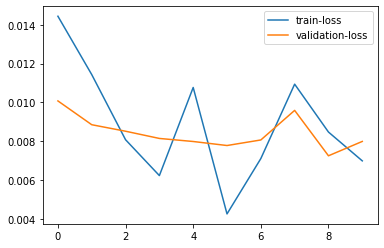

In [28]:
loss_per_epoch = model1.history.history['loss']
loss_vall=model1.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [29]:
model2.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)
model3.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)

Epoch 1/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0122 - val_loss: 0.0131
Epoch 2/10
10/10 [==============================] - 1s 57ms/step - loss: 0.0139 - val_loss: 0.0125
Epoch 3/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0089 - val_loss: 0.0125
Epoch 4/10
10/10 [==============================] - 1s 82ms/step - loss: 0.0095 - val_loss: 0.0122
Epoch 5/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0100 - val_loss: 0.0113
Epoch 6/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0088 - val_loss: 0.0129
Epoch 7/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 8/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0072 - val_loss: 0.0118
Epoch 9/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0066 - val_loss: 0.0118
Epoch 10/10
10/10 [==============================] - 1s 53ms/step - loss: 0.0114 - val_loss: 0.0120
Epoch 1/1

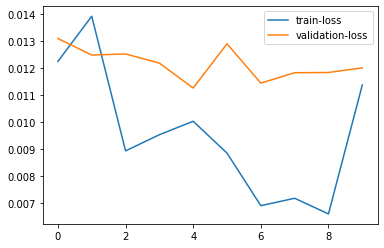

In [30]:
loss_per_epoch = model2.history.history['loss']
loss_vall=model2.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [31]:
model3.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)

Epoch 1/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 2/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0139 - val_loss: 0.0115
Epoch 3/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0060 - val_loss: 0.0098
Epoch 4/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0090 - val_loss: 0.0099
Epoch 5/10
10/10 [==============================] - 1s 81ms/step - loss: 0.0040 - val_loss: 0.0101
Epoch 6/10
10/10 [==============================] - 1s 56ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 7/10
10/10 [==============================] - 1s 57ms/step - loss: 0.0121 - val_loss: 0.0097
Epoch 8/10
10/10 [==============================] - 1s 55ms/step - loss: 0.0077 - val_loss: 0.0098
Epoch 9/10
10/10 [==============================] - 1s 57ms/step - loss: 0.0081 - val_loss: 0.0098
Epoch 10/10
10/10 [==============================] - 0s 53ms/step - loss: 0.0059 - val_loss: 0.0097


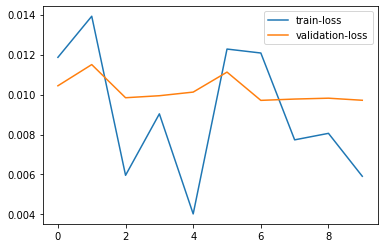

In [32]:
loss_per_epoch = model3.history.history['loss']
loss_vall=model3.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [33]:
test_predictions = []
Q=100
N=400
first_eval_batch = scaled_1_train[Q:Q+n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))
for i in range(N):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [34]:
L_true=  list(data1[mesure[3]][n_input+1+Q:n_input+1+Q+N])

In [35]:

trainPredict = model.predict(train_generator_1)
trainPredict1= model1.predict(train_generator_1)
trainPredict2 = model2.predict(train_generator_1)
trainPredict3= model3.predict(train_generator_1)
true_pre=scaler.inverse_transform(trainPredict)
true_pre1=scaler.inverse_transform(trainPredict1)
true_pre2=scaler.inverse_transform(trainPredict2)
true_pre3=scaler.inverse_transform(trainPredict3)


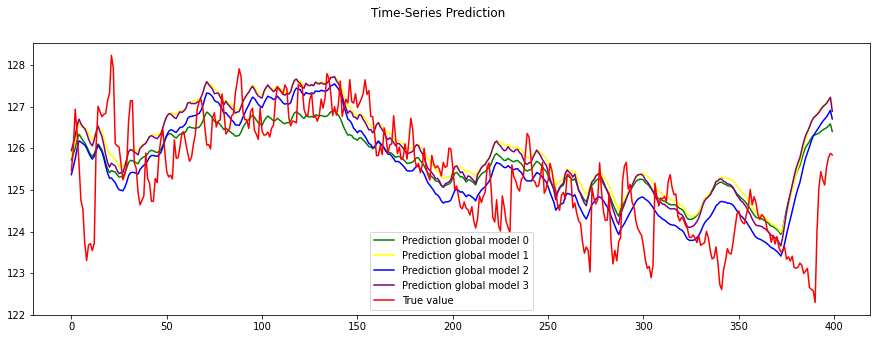

In [36]:
fig=plt.figure(figsize=(15,5))
plt.suptitle('Time-Series Prediction')
plt.plot(range(len(L_true)),true_pre[n_input+Q:n_input+Q+N],label='Prediction global model 0',c="green")
plt.plot(range(len(L_true)),true_pre1[n_input+Q:n_input+Q+N],label='Prediction global model 1',c="yellow")
plt.plot(range(len(L_true)),true_pre2[n_input+Q:n_input+Q+N],label='Prediction global model 2',c="blue")
plt.plot(range(len(L_true)),true_pre3[n_input+Q:n_input+Q+N],label='Prediction global model 3',c="purple")
plt.plot(range(len(L_true)),L_true,label='True value',c="red")
plt.legend()
plt.show()

In [37]:
import json

In [38]:
def create_Model(n_input,activa, LSTM_neurons = 100, layers=3,n_features=0):
  # define model
  model = Sequential()
  if(layers>1):
    model.add(LSTM(LSTM_neurons, activation=activa, input_shape=(n_input, n_features+1),return_sequences=True))
    for i in range(layers-2):
        model.add(LSTM(LSTM_neurons, activation=activa,return_sequences=True))
    model.add(LSTM(LSTM_neurons, activation=activa))
  else:
    model.add(LSTM(LSTM_neurons, activation=activa, input_shape=(n_input, n_features+1)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [39]:
activa=["relu","elu","exponential","sigmoid","tanh","softsign"]
min_RMSE=10
for activa1 in activa:
  for Back_samples in range(18,28,2): #hasta dos días y medio hacia el pasado
    for number_neurons in range(50,126,25): 
      for batch_size in range(50,201,50):
        for num_layers in range(1,4): 
          #if((Back_samples,activa,number_neurons,batch_size,num_layers) in combinaciones_anteriores):
           # continue
          print({
              'Retrasos':Back_samples,
              'Activation':activa1,
              'Neuronas LSTM':number_neurons,
              'Batch size':batch_size,
              'LSTM Layers': num_layers
          })
          n_input = Back_samples # horas hacia atrás
          n_output = 1
          n_features = 0 # variables exógenas
          generator = TimeseriesGenerator(scaled_1_train, scaled_1_train, length=n_input, batch_size=n_output)
          model = create_Model(n_input,activa1,LSTM_neurons=number_neurons,layers=num_layers,n_features=n_features)
          model.fit(generator,epochs=7,verbose=False,batch_size=batch_size)
          predictions = []
          for j in range(n_input,len(list(test_data_1.iloc[:,2]))):
            model_input = scaled_1_test[j-n_input:j]
            model_input = model_input.reshape((1, n_input, n_features+1))
            predictions.append(model.predict(model_input)[0])

          predictions = np.ndarray.flatten(np.array(predictions))  
          test_predictions =  np.zeros(shape=(len(predictions), 5))
          test_predictions[:,0] = predictions
          true_predictions = scaler.inverse_transform(test_predictions)
          rsg_predictions = true_predictions[:,0]
          true_values = np.ndarray.flatten(test_data_1.iloc[n_input:][mesure[2]].values)

          errorMSE = mean_squared_error(true_values,rsg_predictions)
          errorMAE = mean_absolute_error(true_values,rsg_predictions)
          errorRMSE = np.sqrt(errorMSE)
          if(errorRMSE<min_RMSE):
            print('BEST')
            model.save('./drive/MyDrive/DatosInvestigacion/LSTM_1_RS.h5')
            min_RMSE = errorRMSE

          print('RMSE:',errorRMSE)
          print('MAE',errorMAE)
          print('min RMSE',min_RMSE)
          resultado = {
              'Retrasos':Back_samples,
              'Activation':activa1,
              'Neuronas LSTM':number_neurons,
              'Batch size':batch_size,
              'LSTM Layers': num_layers,
              'MSE':errorMSE,
              'MAE':errorMAE,
              'RMSE':errorRMSE
          }
          with open("./drive/MyDrive/DatosInvestigacion/resultados_LSTM_1_RS.txt","a") as file:
            resultado = json.dumps(resultado)
            file.write(resultado)
            file.write('\n')

{'Retrasos': 18, 'Activation': 'relu', 'Neuronas LSTM': 50, 'Batch size': 50, 'LSTM Layers': 1}


KeyboardInterrupt: ignored